In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid", context="paper", font_scale=1.5, palette="colorblind")

SD3

In [2]:
# bias calculation

df_g3 = pd.read_csv('G_gender_count_3.csv')
df_se3 = pd.read_csv('SE_gender_count_3.csv')

male_count_g3 = df_g3['Male'].sum()
female_count_g3 = df_g3['Female'].sum()

male_count_se3 = df_se3['Male'].sum()
female_count_se3 = df_se3['Female'].sum()

total_g3 = male_count_g3 + female_count_g3
total_se3 = male_count_se3 + female_count_se3

percentage_male_g3 = (male_count_g3/total_g3)*100
percentage_female_g3 = (female_count_g3/total_g3)*100

percentage_male_se3 = (male_count_se3/total_se3)*100
percentage_female_se3 = (female_count_se3/total_se3)*100 

SD2

In [3]:
# bias calculation

df_g2 = pd.read_csv('G_gender_count_2.csv')
df_se2 = pd.read_csv('SE_gender_count_2.csv')

male_count_g2 = df_g2['Male'].sum()
female_count_g2 = df_g2['Female'].sum()

male_count_se2 = df_se2['Male'].sum()
female_count_se2 = df_se2['Female'].sum()

total_g2 = male_count_g2 + female_count_g2
total_se2 = male_count_se2 + female_count_se2

percentage_male_g2 = male_count_g2*100/total_g2
percentage_female_g2 = female_count_g2*100/total_g2

percentage_male_se2 = male_count_se2*100/total_se2
percentage_female_se2 = female_count_se2*100/total_se2

SDXL

In [4]:
# bias calculation

df_g_xl = pd.read_csv('G_gender_count_xl.csv')
df_se_xl = pd.read_csv('SE_gender_count_xl.csv')


male_count_g_xl = df_g_xl['Male'].sum()
female_count_g_xl = df_g_xl['Female'].sum()

male_count_se_xl = df_se_xl['Male'].sum()
female_count_se_xl = df_se_xl['Female'].sum()

total_g_xl = male_count_g_xl + female_count_g_xl
total_se_xl = male_count_se_xl + female_count_se_xl

percentage_male_g_xl = male_count_g_xl*100/total_g_xl
percentage_female_g_xl = female_count_g_xl*100/total_g_xl

percentage_male_se_xl = male_count_se_xl*100/total_se_xl
percentage_female_se_xl = female_count_se_xl*100/total_se_xl

In [5]:
# overall bias in view for all versions

total_male_3 = male_count_g3 + male_count_se3
total_female_3 = female_count_g3 + female_count_se3
total_3 = total_male_3 + total_female_3

percentage_male_3 = total_male_3*100/total_3
percentage_female_3 = total_female_3*100/total_3


total_male_2 = male_count_g2 + male_count_se2
total_female_2 = female_count_g2 + female_count_se2
total_2 = total_male_2 + total_female_2

percentage_male_2 = total_male_2*100/total_2
percentage_female_2 = total_female_2*100/total_2

total_male_xl = male_count_g_xl + male_count_se_xl
total_female_xl = female_count_g_xl + female_count_se_xl
total_xl = total_male_xl + total_female_xl

percentage_male_xl = total_male_xl*100/total_xl
percentage_female_xl = total_female_xl*100/total_xl


Overall bias by Stable Version, Gender and Prompt type

In [6]:
data = {
    'Version': ['SD3', 'SD3', 'SD3', 'SD3', 'SD2', 'SD2', 'SD2', 'SD2', 'SDXL', 'SDXL', 'SDXL', 'SDXL'],
    'Prompt Type': ['General', 'General', 'Software Eng.', 'Software Eng.', 'General', 'General', 'Software Eng.', 'Software Eng.', 'General', 'General', 'Software Eng.', 'Software Eng.'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Percentage': [percentage_male_g3, percentage_female_g3, percentage_male_se3, percentage_female_se3, percentage_male_g2, percentage_female_g2, percentage_male_se2, percentage_female_se2, 
                   percentage_male_g_xl, percentage_female_g_xl, percentage_male_se_xl, percentage_female_se_xl]
}

df = pd.DataFrame(data)

/opt/anaconda3/envs/bias/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


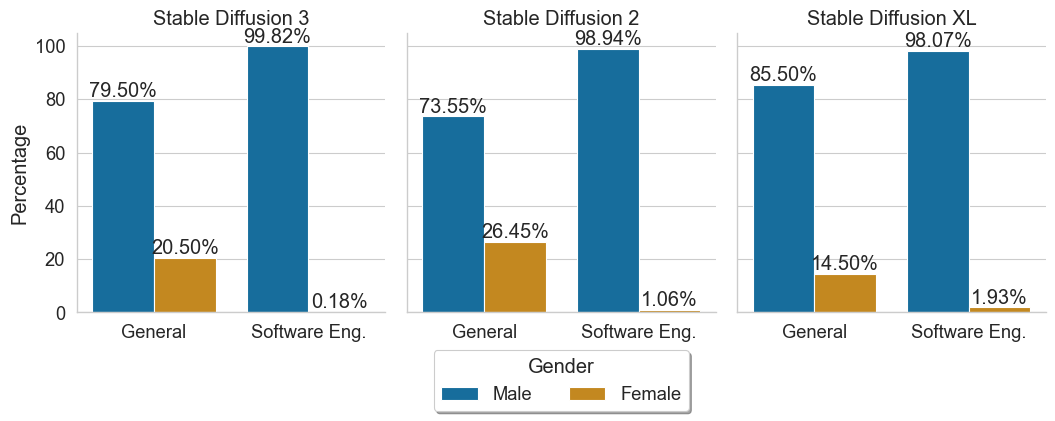

In [12]:
# Plotting
g = sns.catplot(x="Prompt Type", y="Percentage", hue="Gender", col="Version",
                data=df, kind="bar", height=4, aspect=0.9)


g.set_axis_labels("", "Percentage")
g.axes[0,0].set_title("Stable Diffusion 3")
g.axes[0,1].set_title("Stable Diffusion 2")
g.axes[0,2].set_title("Stable Diffusion XL")
# g.set_titles("Version {col_name}")
# g.set(ylim=(0, 100))

# Adding a centered title
# plt.suptitle('Percentage of Male and Female for all SD Versions by Gender & Prompt Type', fontsize=16, y=1.03)

# Adding labels to each bar
for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0:
          ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
                f'{p.get_height():.2f}%', ha='center', va='bottom')

sns.move_legend(g, "lower left", bbox_to_anchor=(0.37, -0.08), ncols=2, frameon=True, shadow=True, fancybox=True)
plt.savefig('imgs/gender_bias.pdf', bbox_inches='tight')
plt.show()

## Table Generation

In [145]:
bias_sd3_g = abs(percentage_male_g3 - percentage_female_g3)/100
bias_sd3_se = abs(percentage_male_se3 - percentage_female_se3)/100
bias_sd3 = (bias_sd3_se - bias_sd3_g)/bias_sd3_g

In [146]:
bias_sd2_g = abs(percentage_male_g2/100 - percentage_female_g2/100)
bias_sd2_se = abs(percentage_male_se2/100 - percentage_female_se2/100)
bias_sd2 = (bias_sd2_se - bias_sd2_g) / bias_sd2_g

In [147]:
bias_sdxl_g = abs(percentage_male_g_xl/100 - percentage_female_g_xl/100)
bias_sdxl_se = abs(percentage_male_se_xl/100 - percentage_female_se_xl/100)
bias_sdxl = (bias_sdxl_se - bias_sdxl_g) / bias_sdxl_g

In [148]:
bias_table = pd.DataFrame([
  [bias_sd3_g, bias_sd3_se, bias_sd3],
  [bias_sd2_g, bias_sd2_se, bias_sd2],
  [bias_sdxl_g, bias_sdxl_se, bias_sdxl]
], columns=['General Prompt', 'Software Eng. Prompt', 'Delta'], index=['Stable Diffusion 3', 'Stable Diffusion 2', 'Stable Diffusion XL'])

In [149]:
bias_table

,General Prompt,Software Eng. Prompt,Delta
Stable Diffusion 3,0.590018,0.996435,0.688822
Stable Diffusion 2,0.471074,0.978742,1.077681
Stable Diffusion XL,0.709991,0.961471,0.354202


In [150]:
bias_table.round(2).to_latex('tables/gender_bias.tex', escape=False, float_format="%.2f")

Overall Bias by Stable Version and Gender

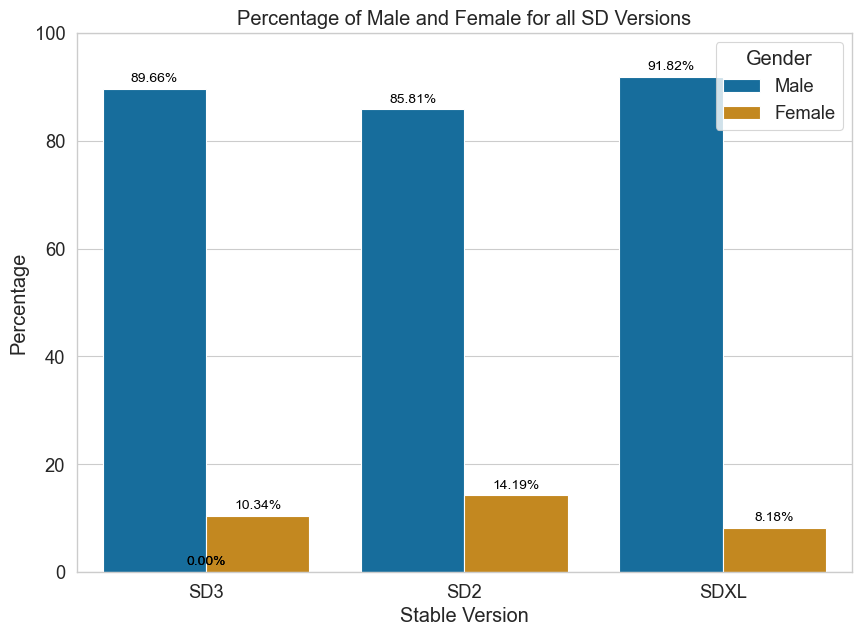

In [151]:
data_overall = {
    'Stable Version': ['SD3', 'SD3', 'SD2', 'SD2', 'SDXL', 'SDXL'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Percentage': [percentage_male_3, percentage_female_3, percentage_male_2, percentage_female_2, percentage_male_xl, percentage_female_xl]
}

df_overall_bias = pd.DataFrame(data_overall)

# Plotting
plt.figure(figsize=(10, 7))
graph_overall = sns.barplot(x='Stable Version', y='Percentage', hue='Gender', data=df_overall_bias)
plt.title('Percentage of Male and Female for all SD Versions')

# Adding labels to the bars
for p in graph_overall.patches:
    graph_overall.annotate(f'{p.get_height():.2f}%', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='bottom', 
                           fontsize=10, color='black', xytext=(0, 3), 
                           textcoords='offset points')

plt.ylim(0, 100)
plt.show()

## Task analysis

In [152]:
def compute_bias(df):
  df_g3 = df.copy()
  df_g3['Male'] = df_g3['Male']/20
  df_g3['Female'] = df_g3['Female']/20
  df_g3['Bias'] = abs(df_g3['Male']-df_g3['Female'])
  if df_g3['Prompt'].str.contains('person').all():
    print('contains person')
    df_g3['Prompt'] = df_g3['Prompt'].str.replace('Photo portrait of That person', '')
  else:
    df_g3['Prompt'] = df_g3['Prompt'].str.replace('Photo portrait of a Software Engineer that', '')
  
  df_g3.set_index('Prompt', inplace=True)
  df_g3.drop(columns=['Unnamed: 0', 'Male', 'Female'], inplace=True)
  return df_g3


In [153]:
df_se3 = compute_bias(df_se3)
df_g3 = compute_bias(df_g3)
df_g2 = compute_bias(df_g2)
df_se2 = compute_bias(df_se2)
df_g_xl = compute_bias(df_g_xl)
df_se_xl = compute_bias(df_se_xl)

contains person
contains person
contains person


In [159]:
# merge all dataframes
df_bias = pd.concat([df_g3, df_se3, df_g2, df_se2, df_g_xl, df_se_xl], axis=1, keys=['SD3', 'SD3', 'SD2', 'SD2', 'SDXL', 'SDXL'])

In [172]:
df_bias.index.name = 'Task'
df_bias.index = df_bias.index.str.strip().str.capitalize()
df_bias.index = df_bias.index.str.replace('.', '')

In [176]:
df_bias.to_latex('bias_table.tex', escape=False, float_format="%.2f")
df_bias.to_csv('bias_table.csv')